# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 20th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image "face.png" in the folder "images" and visualize the RGB image as well as each of its channels separately (R, G, and B).
Note: Before applying the histogram, you should pass the image into float.

In [2]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
from skimage import exposure
from skimage import img_as_float
from skimage.color import rgba2rgb
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.transform import resize

face = io.imread('images/face.png')
face_red = face[:,:,0]
face_green = face[:,:,1]
face_blue = face[:,:,2]


fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,4,1)
plt.imshow(face)
ax.title.set_text("Original Image")

ax = fig.add_subplot(1,4,2)
plt.imshow(face_red,cmap="gray")
ax.title.set_text("Red Channel")

ax= fig.add_subplot(1,4,3)
plt.imshow(face_green,cmap="gray")
ax.title.set_text("Green Channel")

ax= fig.add_subplot(1,4,4)
plt.imshow(face_green,cmap="gray")
ax.title.set_text("Blue Channel")


# We pass the image into float using the img_as_float function
face_float = img_as_float(face) 

b) Visualize the histogram of the image. What is the histogram representing for an image? 
The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

    - Obtain the histogram with 8 and 32 bins. 

    - Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

In [3]:
#your solution

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `face.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the grayscale image in (1) with a transposed version of the mask in (2).
4. Convolve the grayscale image in (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

**Visualize the output of each step (1 to 4) next to each other. Write short titles on each figure to make them understandable.**

#### Questions

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).

Original image minimum and maximum values: 0, 255
Grayscale image minimum and maximum values: 0.0, 1.0
Grayscale image after convolving it with the one-dimensional horizontal mask minimum and maximum values: 0.0, 0.9956992941176471
Grayscale image after convolving it with the one-dimensional transposed minimum and maximum values: 0.0, 0.9999999999999999
Grayscale image after convolving it with the two-dimensional mask minimum and maximum values: 0.0, 0.9438707712418295


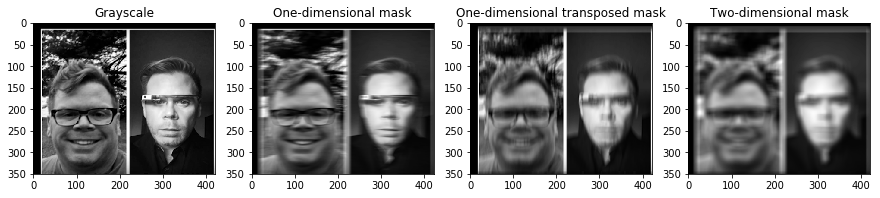

In [4]:
# We read the face.png image with io.imread
face = io.imread('images/face.png')
# Wr convert it to grayscale with the function rgb2gray from the skimage.color package
face_grayscale = rgb2gray(face)

# We create a horizontal mask 
mask_h1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
# We normalize it dividing it by the sum of all its values
mask_h1d = mask_h1d / np.sum(mask_h1d)
# We apply it to the grayscale image with the ndimage.convolve function
# using standard parameters
face_convolve_h1d = ndimage.convolve(face_grayscale, mask_h1d, mode='constant', cval=0.0)

# Now, we transpose the horizontal mask (now it's vertical)
mask_h1d_transposed = mask_h1d.transpose()
# and we apply it, as before, to the grayscale image
face_convolve_h1d_transposed = ndimage.convolve(face_grayscale, mask_h1d_transposed, mode='constant', cval=0.0)

# We create a two-dimensional uniform mask by
# creating a np.zeros array of 15x15,
# putting all its values to
mask_h2d = np.zeros((15,15),dtype=np.uint8)
mask_h2d[:,:] = 1
# We normalize it dividing it by the sum of all its values 
mask_h2d = mask_h2d / np.sum(mask_h2d)
# We apply it to the grayscale image 
face_convolve_h2d = ndimage.convolve(face_grayscale, mask_h2d, mode='constant', cval=0.0)

# We plot the results
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,4,1)
plt.title('Grayscale')
plt.imshow(face_grayscale, cmap="gray")
fig.add_subplot(1,4,2)
plt.title('One-dimensional mask')
plt.imshow(face_convolve_h1d, cmap="gray")
fig.add_subplot(1,4,3)
plt.title('One-dimensional transposed mask')
plt.imshow(face_convolve_h1d_transposed, cmap="gray")
fig.add_subplot(1,4,4)
plt.title('Two-dimensional mask')
plt.imshow(face_convolve_h2d, cmap="gray")

print(f"Original image minimum and maximum values: {face.min()}, {face.max()}")
print(f"Grayscale image minimum and maximum values: {face_grayscale.min()}, {face_grayscale.max()}")
print(f"Grayscale image after convolving it with the one-dimensional horizontal mask minimum and maximum values: {face_convolve_h1d.min()}, {face_convolve_h1d.max()}")
print(f"Grayscale image after convolving it with the one-dimensional transposed minimum and maximum values: {face_convolve_h1d_transposed.min()}, {face_convolve_h1d_transposed.max()}")
print(f"Grayscale image after convolving it with the two-dimensional mask minimum and maximum values: {face_convolve_h2d.min()}, {face_convolve_h2d.max()}")

#### According to the results printed and ploted in the previous cell, we proceed to answer the questions posed: 

We can tell that the main difference is when we convert the image from RGB/RGBA to gray with the rgb2gray function, as it passes all values to float and put them in a range between 0 and 1.
There's only a slight difference in the values of the image between the different convolutions using each mask. The values change, but the range is still aproximately between 0 and 1.

Nevertheless, the effect caused in the image when doing the convolution does change with each mask, although the general effect is the same: smoothing. The one-dimensional horizontal mask clearly smoothes the image in the x axis, while the one-dimensional transposed mask does it in the y axis. The two-dimensional uniform mask, however, applies it in both x and y axis equally.

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)


im_2=img_as_float(im_2)

In [5]:
# We try both functions to compare their results
face_2 = np.array(face, dtype = 'float')
print(f"Example value from 1.: {face_2[20][20]}")
face_2 = np.array(face)
face_2 = img_as_float(face_2)
print(f"Example value from 2.: {face_2[20][20]}")

Example value from 1.: [211. 216. 214. 255.]
Example value from 2.: [0.82745098 0.84705882 0.83921569 1.        ]


#### Difference between 1 and 2: 
The main difference between 1. and 2. is that in 1. the only thing we do is convert all values to float, without changing its range (from 0. to 255.), and in 2. we convert the values to float and rescale them to be between 0. and 1.

c) Can we convolve a color (RGB) image? In order to convolve an RGB each of the channels must be convolved separately.

Implement a function that applies a 3-channel filter and visualize its result on `face.png` with a 15x15 uniform mask.

Which is the result obtained when applying a single-channel filter channel by channel separately?
Note: Before applying the convolution assure that the color image is of 3 channels and if not use rgba2rgb().

#### Answers:

As we see in the results below, it's obvious that we can colvolve a RGB image if we convolve each channel separately and put them together in each of the RGB image channels. 

When applying a single-channel filter, we simply smooth the corresponding channel. If we plot it in grayscale, we see the image in grayscale it's been smoothed. The difference between each single-channel filter is small. 

On the other hand, when putting together the three single-channel filtered images together, we get the color image back, but smoothed.

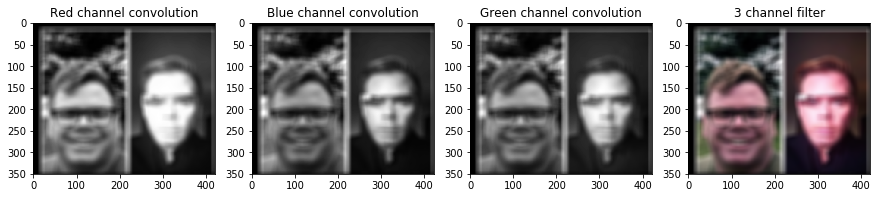

In [6]:
# We use rgba2rgb to convert the RGBA image to RGB
face_3channels = rgba2rgb(face)

# We take each channel
face_red = face_3channels[:,:,0]
face_blue = face_3channels[:,:,1]
face_green = face_3channels[:,:,2]

# We convolve each channel separately by applying 
# a two-dimensional uniform mask 'mask_h2d', the one
# from the previous exercise, with ndimage.convolve
# function
face_red_convolve = ndimage.convolve(face_red, mask_h2d, mode='constant', cval=0.0)
face_blue_convolve = ndimage.convolve(face_blue, mask_h2d, mode='constant', cval=0.0)
face_green_convolve = ndimage.convolve(face_green, mask_h2d, mode='constant', cval=0.0)

# We change the three original color channels
# for the ones we've just convolved
face_3channels[:,:,0] = face_red_convolve 
face_3channels[:,:,1] = face_blue_convolve
face_3channels[:,:,2] = face_green_convolve

# We plot the red, blue and green 1 channel 
# convolutions and the 3 channel convolution
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,4,1)
plt.title('Red channel convolution')
plt.imshow(face_red_convolve, cmap="gray")
fig.add_subplot(1,4,2)
plt.title('Blue channel convolution')
plt.imshow(face_blue_convolve, cmap="gray")
fig.add_subplot(1,4,3)
plt.title('Green channel convolution')
plt.imshow(face_green_convolve, cmap="gray")
fig.add_subplot(1,4,4)
plt.title('3 channel filter')
plt.imshow(face_3channels, cmap="gray")

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms after applying the 15x15 convolution of the previous exercise.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.


/Users/clararivadulla/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<BarContainer object of 32 artists>

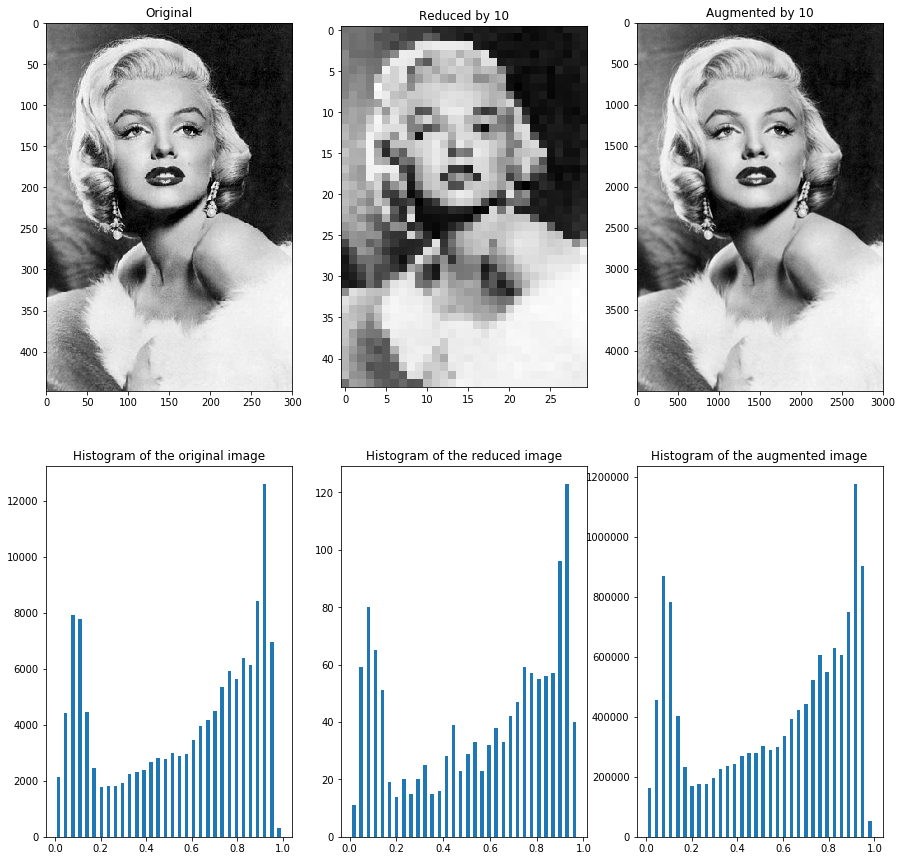

In [30]:
# We read one of Monroe's images with io.imread 
monroe = io.imread('images/monro4.jpg')

# We reduce the image with the resize function from skimage.transform package
# giving it the image and both dimensions of the shape divided by 10 
# as parameters
monroe_reduced = resize(monroe, (monroe.shape[0]//10, monroe.shape[1]//10))

# We augment the image also with the resize function but multiplying 
# instead of dividing its shape
monroe_augmented = resize(monroe, (monroe.shape[0]*10, monroe.shape[1]*10))

# We plot the original, the reduced and the augmented images
fig = plt.figure(figsize=(15,15))
fig.add_subplot(2,3,1)
plt.title('Original')
plt.imshow(monroe, cmap = 'gray')
fig.add_subplot(2,3,2)
plt.title('Reduced by 10')
plt.imshow(monroe_reduced, cmap = 'gray')
fig.add_subplot(2,3,3)
plt.title('Augmented by 10')
plt.imshow(monroe_augmented, cmap = 'gray')

# We create each of their histograms with the exposure.histogram function
# making sure that the images have float values
# We give it i.e. 32 nbits
original_hst = exposure.histogram(img_as_float(monroe), nbins = 32)
reduced_hst = exposure.histogram(img_as_float(monroe_reduced), nbins = 32)
augmented_hst = exposure.histogram(img_as_float(monroe_augmented), nbins = 32)

# We plot them
fig.add_subplot(2,3,4)
plt.title('Histogram of the original image')
plt.bar(original_hst[1],original_hst[0], width=0.015)
fig.add_subplot(2,3,5)
plt.title('Histogram of the reduced image')
plt.bar(reduced_hst[1], reduced_hst[0], width=0.015)
fig.add_subplot(2,3,6)
plt.title('Histogram of the augmented image')
plt.bar(augmented_hst[1], augmented_hst[0], width=0.015)

#### Observing the differences between the three histograms:

If we observe the three histograms (the one of the orginal image, the one of the reduced and the one of the augmented) we can only see a small difference between them. However, even if it's small, it's representative, as it's made clear that, when applying convolution, we modify the values of the pixels of the image and, as it's smoothed, we can lose or vary the frequencies of some of them. 

Although the general aspect of the histogram remains quite the same, there are some critical values that have really suffered some substantial changes (around 0.50 in the x axis, or in the rightmost). The values of the augmented image have changed a bit more, as we see it in its left bar, that's increased considerably. 

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original image and calculate its histogram.
2. Convolve the  reduced image 10 times and calculate its histogram.
3. Convolve the  augmented image 10 times and calculate its histogram.

Text(0.5,1,'Histogram of the augmented convoluted image')

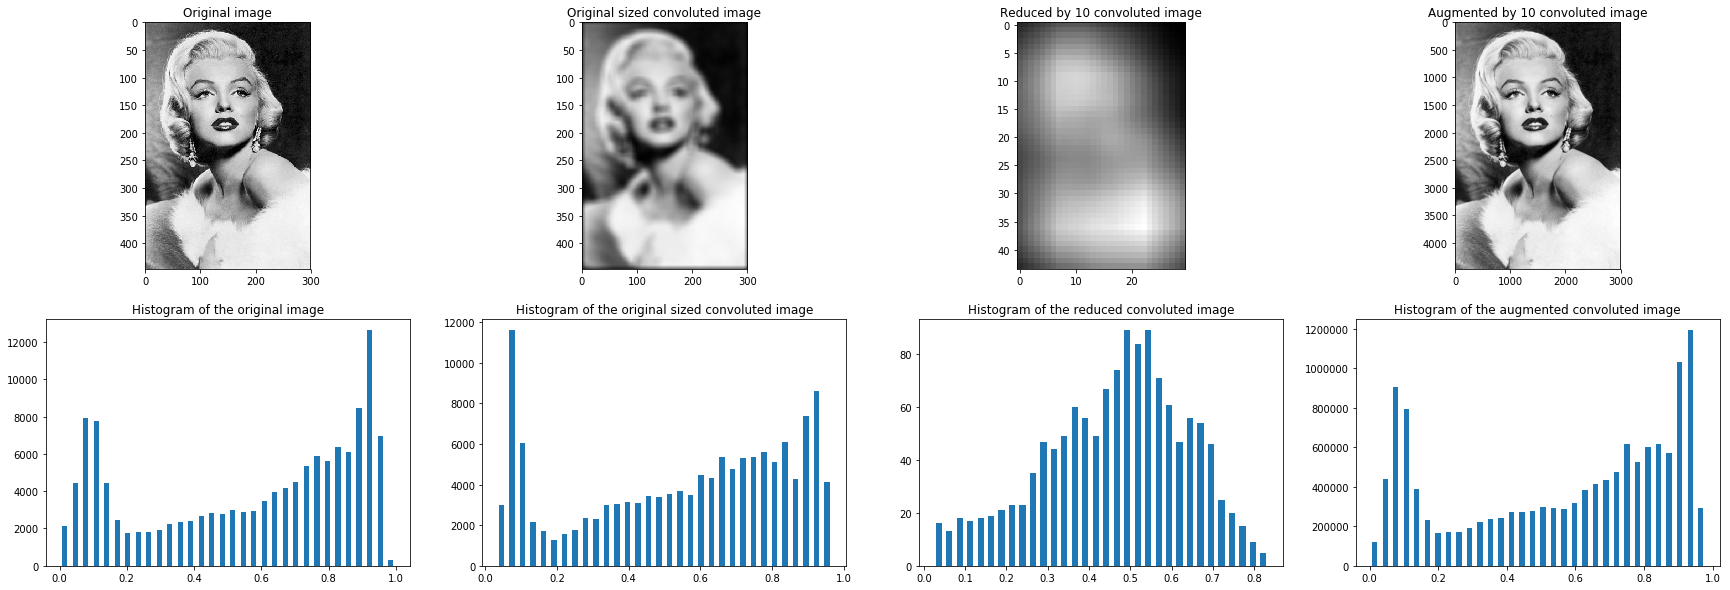

In [31]:
# We apply the convolution to each of our images (the original, the reduced and 
# the augmented) with the 15x15 uniform mask 'mask_h2d'
original_convolve = ndimage.convolve(monroe, mask_h2d, mode='constant', cval=0.0)
reduced_convolve = ndimage.convolve(monroe_reduced, mask_h2d, mode='constant', cval=0.0)
augmented_convolve = ndimage.convolve(monroe_augmented, mask_h2d, mode='constant', cval=0.0)

# We plot the new convoluted images
fig = plt.figure(figsize=(30,10))
fig.add_subplot(2,4,1)
plt.title('Original image')
plt.imshow(monroe, cmap = 'gray')
fig.add_subplot(2,4,2)
plt.title('Original sized convoluted image')
plt.imshow(original_convolve, cmap = 'gray')
fig.add_subplot(2,4,3)
plt.title('Reduced by 10 convoluted image')
plt.imshow(reduced_convolve, cmap = 'gray')
fig.add_subplot(2,4,4)
plt.title('Augmented by 10 convoluted image')
plt.imshow(augmented_convolve, cmap = 'gray')

# We create the histograms of the convoluted images
hst_original_convolve = exposure.histogram(img_as_float(original_convolve), nbins = 32)
hst_reduced_convolve = exposure.histogram(reduced_convolve, nbins = 32)
hst_augmented_convolve = exposure.histogram(augmented_convolve, nbins = 32)

# We plot them
fig.add_subplot(2,4,5)
plt.bar(original_hst[1],original_hst[0], width=0.015)
plt.title('Histogram of the original image')
fig.add_subplot(2,4,6)
plt.bar(hst_original_convolve[1],hst_original_convolve[0], width=0.015)
plt.title('Histogram of the original sized convoluted image')
fig.add_subplot(2,4,7)
plt.bar(hst_reduced_convolve[1],hst_reduced_convolve[0], width=0.015)
plt.title('Histogram of the reduced convoluted image')
fig.add_subplot(2,4,8)
plt.bar(hst_augmented_convolve[1],hst_augmented_convolve[0], width=0.015)
plt.title('Histogram of the augmented convoluted image')

#### Comparing the results:

In the four histograms we've just displayed, the changes when applying convolution to an original-sized, reduced or augmented images are much more clear. 

First, we can see that the histogram of the original image and the histogram of the augmented convoluted image are pretty much the same. That's due to the shape of the augmented image. As its width and height have been multiplied by 10, the convolution applied with the 15x15 uniform mask will have a gentler efect, because a pixel with certain value will now be further from the pixels with different values and the mask won't change them much. That's why the smoothing is almost imperceptive if we look at the 'augmented by 10 convoluted image'. If the smoothing is slight so will be the differences between the values of the image and their corresponding histograms.

The histogram of the original sized convoluted image, however, is quite different from the original one. As the size is smaller than the augmented one, the mask has had more effect on it and the values have changed more. Same, and much more obvious, with the reduced image. The smoothing on it is glaring and the values of the pixels of the image have really changed a lot. That's why its histogram is more than far from the original.

At least when using the resize and ndimage.convolve functions, we can conclude that the smaller the image, the more evident the effect of the convolution will result and the further its histogram will be from the original, and viceversa.

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `face.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: search for the skimage.filters function for creating the different filters.

In [36]:
#your solution

b) **(Optional)** Apply the smoothing on some other images and present their results.

In [37]:
#your solution

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

In [38]:
#your solution

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

In [39]:
#your solution

c) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


In [40]:
#your solution

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

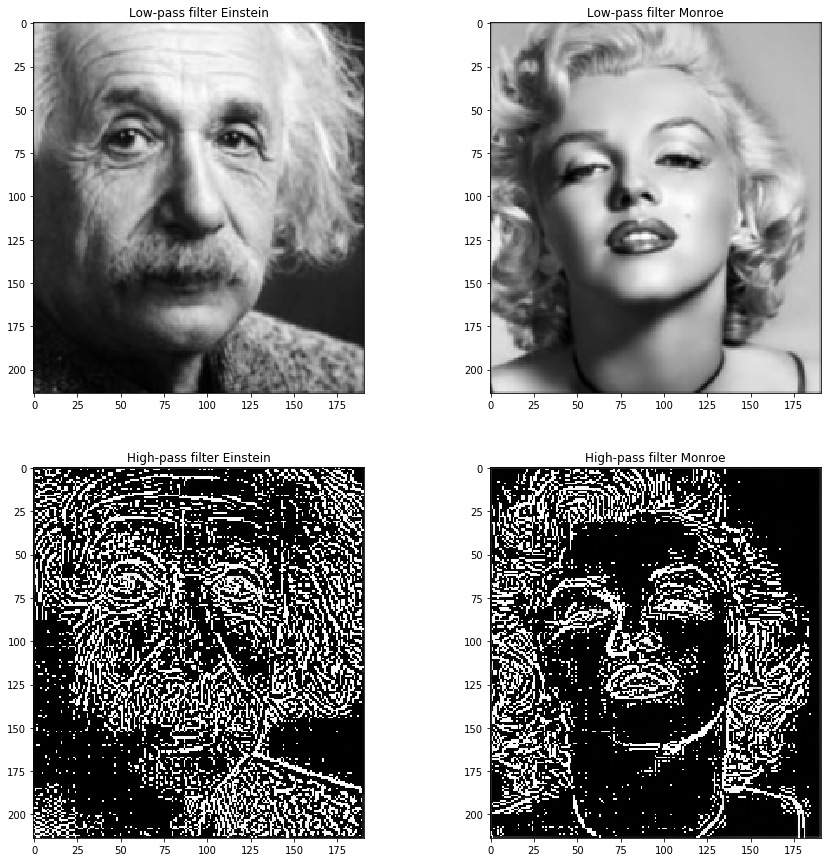

In [41]:
# We read both einstein and monroe jpg images
# with io.imread function
einstein = io.imread('images/Einstein.jpg')
monroe2 = io.imread('images/monroe.jpg')

# We create a 3x3 non-uniform mask 
# with values:
    #  1  2  1
    #  2  4  2
    #  1  2  1
mask = np.zeros((3,3), dtype=np.uint)
mask[:,1] = 2
mask[1,:] = 2
mask[1,1] = 4
# We normalize it by dividing its values
# by the sum of all of them (mean filter)
mask = mask / np.sum(mask)

# We add a low-pass filter by applying smoothing
# with ndimage.convolve function, using the 3x3 non-uniform
# mask we've just created
l_einstein = ndimage.convolve(einstein, mask, mode='constant', cval=0.0)
l_monroe = ndimage.convolve(monroe2, mask, mode='constant', cval=0.0)

# We plot both convolved images
fig = plt.figure(figsize=(15,15))
fig.add_subplot(2,2,1)
plt.title('Low-pass filter Einstein')
plt.imshow(l_einstein, cmap = 'gray')
fig.add_subplot(2,2,2)
plt.title('Low-pass filter Monroe')
plt.imshow(l_monroe, cmap = 'gray')

# We now apply a high-pass filter by substracting
# the low-pass filtered images from the original ones
h_monroe = monroe2 - l_monroe
h_einstein = einstein - l_einstein

# And we plot them
fig.add_subplot(2,2,3)
plt.title('High-pass filter Einstein')
plt.imshow(h_einstein, cmap = 'gray')
fig.add_subplot(2,2,4)
plt.title('High-pass filter Monroe')
plt.imshow(h_monroe, cmap = 'gray')

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

/Users/clararivadulla/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


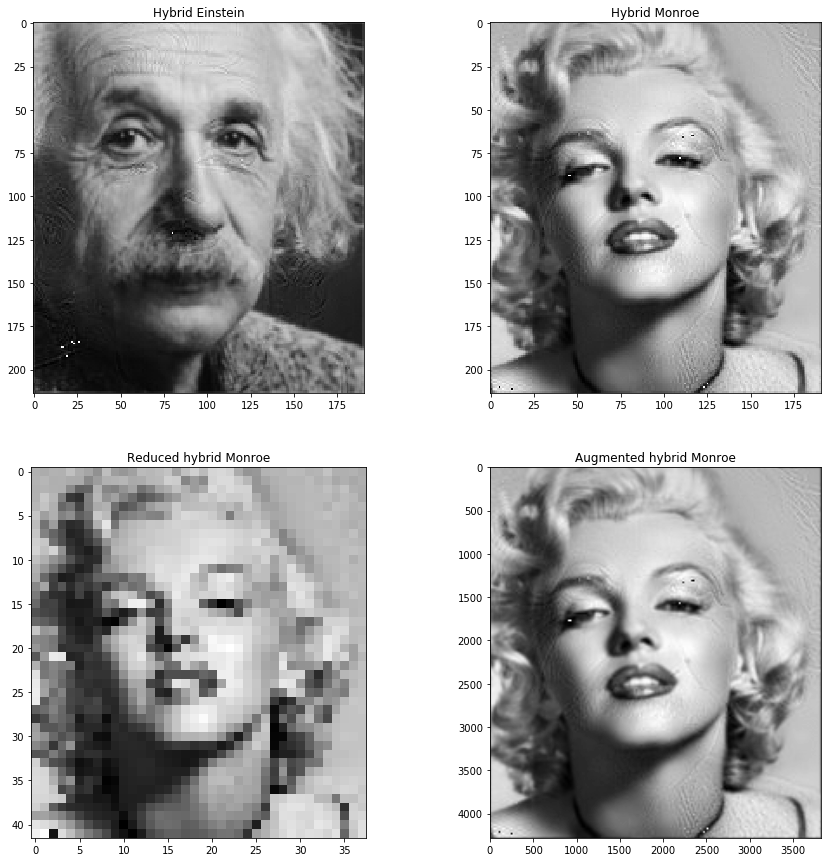

In [42]:
# In order to see Marylin Monroe when adding
# one of the low-pass filtered images to the 
# high-pass filtered of the other, we must
# take the low-pass filtered Marilyn and 
# the high-pass filtered Einstein

# We add them to get both hybrids
hybrid_monroe = l_monroe + h_einstein
hybrid_einstein = l_einstein + h_monroe

# We plot them
fig = plt.figure(figsize=(15,15))
fig.add_subplot(2,2,1)
plt.title('Hybrid Einstein')
plt.imshow(hybrid_einstein, cmap = 'gray')
fig.add_subplot(2,2,2)
plt.title('Hybrid Monroe')
plt.imshow(hybrid_monroe, cmap = 'gray')

# Now, we resize the 'hybrid_monroe' images:
# first, we reduce its dimension, i.e., by 5;
# then, we augment it, i.e., by 10
reduced_hybrid_monroe = resize(hybrid_monroe, (hybrid_monroe.shape[0]//5, hybrid_monroe.shape[1]//5))
augmented_hybrid_monroe = resize(hybrid_monroe, (hybrid_monroe.shape[0]*20, hybrid_monroe.shape[1]*20))

# Finally, we plot them
fig.add_subplot(2,2,3)
plt.title('Reduced hybrid Monroe')
plt.imshow(reduced_hybrid_monroe, cmap = 'gray')
fig.add_subplot(2,2,4)
plt.title('Augmented hybrid Monroe')
plt.imshow(augmented_hybrid_monroe, cmap = 'gray')

#### Comments on the results:

If we reduce or augment the hybrid image, the remains of Einstein's image fade a bit. In the reduced one, we could never tell that the image was an hybrid, as its resolution is now really bad. However, we can still see some details from Einstein's image in the augmented hybrid one, although a bit less obvious than in the original sized.

c) **(Optional)**

Compute hybrid images from other images. Apply it over color images.

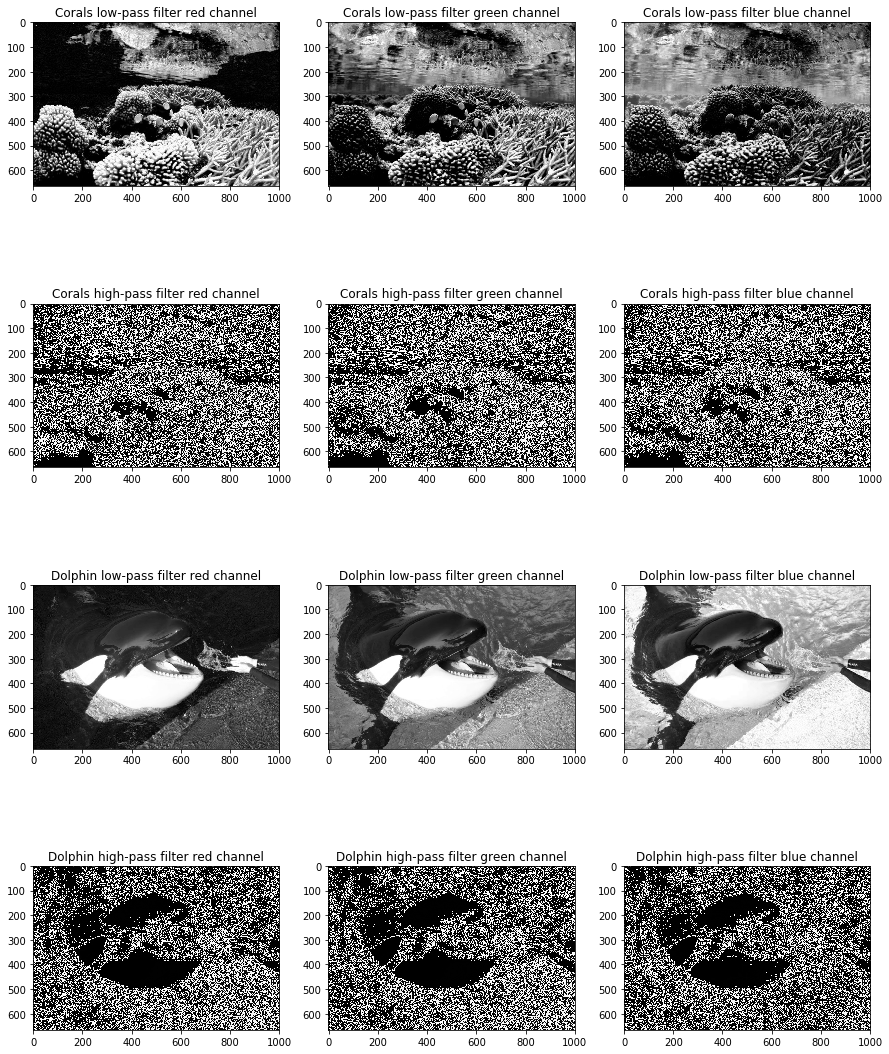

In [43]:
# For this exercise, we've chosen two color images
# with almost the same shape. As the dolphin image
# is a bit taller, we take only the pixels that
# fit in the corals' dimensions.
corals = io.imread('images/corals.jpg')
dolphin_img = io.imread('images/doulphin.jpg')
dolphin = np.zeros(corals.shape, corals.dtype)
dolphin[:,:] = dolphin_img[:666,:]

# We extract each of the RGB channels of the corals image and 
# apply the 3x3 non-uniform mask we've created before (in the previous
# exercise) in order to apply a low-pass filter by convolving them
l_corals_red = ndimage.convolve(corals[:,:,0], mask, mode='constant', cval=0.0)
l_corals_green = ndimage.convolve(corals[:,:,1], mask, mode='constant', cval=0.0)
l_corals_blue = ndimage.convolve(corals[:,:,2], mask, mode='constant', cval=0.0)

# We apply the high-pass filter of each channel 
# by substracting the low-pass filtered image
# from the original one
h_corals_red = corals[:,:,0] - l_corals_red
h_corals_green = corals[:,:,1] - l_corals_green
h_corals_blue = corals[:,:,2] - l_corals_blue

# We do the exact same with the other RGB image
l_dolphin_red = ndimage.convolve(dolphin[:,:,0], mask, mode='constant', cval=0.0)
l_dolphin_green = ndimage.convolve(dolphin[:,:,1], mask, mode='constant', cval=0.0)
l_dolphin_blue = ndimage.convolve(dolphin[:,:,2], mask, mode='constant', cval=0.0)

h_dolphin_red = dolphin[:,:,0] - l_dolphin_red
h_dolphin_green = dolphin[:,:,1] - l_dolphin_green
h_dolphin_blue = dolphin[:,:,2] - l_dolphin_blue

# We plot all filtered images of all channels
fig = plt.figure(figsize=(15,25))
fig.add_subplot(5,3,1)
plt.title('Corals low-pass filter red channel')
plt.imshow(l_corals_red, cmap = 'gray')
fig.add_subplot(5,3,2)
plt.title('Corals low-pass filter green channel')
plt.imshow(l_corals_green, cmap = 'gray')
fig.add_subplot(5,3,3)
plt.title('Corals low-pass filter blue channel')
plt.imshow(l_corals_blue, cmap = 'gray')

fig.add_subplot(5,3,4)
plt.title('Corals high-pass filter red channel')
plt.imshow(h_corals_red, cmap = 'gray')
fig.add_subplot(5,3,5)
plt.title('Corals high-pass filter green channel')
plt.imshow(h_corals_green, cmap = 'gray')
fig.add_subplot(5,3,6)
plt.title('Corals high-pass filter blue channel')
plt.imshow(h_corals_blue, cmap = 'gray')

fig.add_subplot(5,3,7)
plt.title('Dolphin low-pass filter red channel')
plt.imshow(l_dolphin_red, cmap = 'gray')
fig.add_subplot(5,3,8)
plt.title('Dolphin low-pass filter green channel')
plt.imshow(l_dolphin_green, cmap = 'gray')
fig.add_subplot(5,3,9)
plt.title('Dolphin low-pass filter blue channel')
plt.imshow(l_dolphin_blue, cmap = 'gray')

fig.add_subplot(5,3,10)
plt.title('Dolphin high-pass filter red channel')
plt.imshow(h_dolphin_red, cmap = 'gray')
fig.add_subplot(5,3,11)
plt.title('Dolphin high-pass filter green channel')
plt.imshow(h_dolphin_green, cmap = 'gray')
fig.add_subplot(5,3,12)
plt.title('Dolphin high-pass filter blue channel')
plt.imshow(h_dolphin_blue, cmap = 'gray')

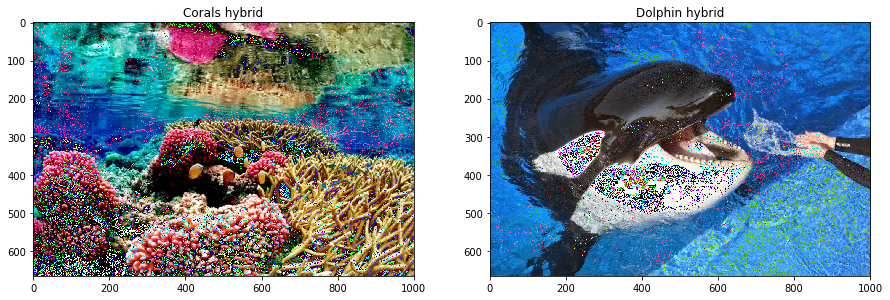

In [44]:
# We create the hybrid of each channel of each RGB image
dolphin_hybrid_red = l_dolphin_red + h_corals_red
dolphin_hybrid_green = l_dolphin_green + h_corals_green
dolphin_hybrid_blue = l_dolphin_blue + h_corals_blue

corals_hybrid_red = l_corals_red + h_dolphin_red
corals_hybrid_green = l_corals_green + h_dolphin_green
corals_hybrid_blue = l_corals_blue + h_dolphin_blue

# We create two arrays (one for each image)
# in order to put together our separate
# hybrid channels and have the right
# RGB hybrid images
dolphin_hybrid = np.zeros((dolphin.shape[0], dolphin.shape[1], 3), dtype=dolphin_hybrid_red.dtype)
corals_hybrid = np.zeros((corals.shape[0], corals.shape[1], 3), dtype=corals_hybrid_red.dtype)

# We fill each channel with its corresponding
# hybrid channel
dolphin_hybrid[:,:,0] = dolphin_hybrid_red
dolphin_hybrid[:,:,1] = dolphin_hybrid_green
dolphin_hybrid[:,:,2] = dolphin_hybrid_blue

corals_hybrid[:,:,0] = corals_hybrid_red
corals_hybrid[:,:,1] = corals_hybrid_green
corals_hybrid[:,:,2] = corals_hybrid_blue

# We plot the final hybrid images
fig = plt.figure(figsize=(15,25))
fig.add_subplot(1,2,1)
plt.title('Corals hybrid')
plt.imshow(corals_hybrid, cmap = 'gray')
fig.add_subplot(1,2,2)
plt.title('Dolphin hybrid')
plt.imshow(dolphin_hybrid, cmap = 'gray')

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code, you do not need to implement anything.

In [ ]:
#your solution